<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/DimensionalReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np


In [ ]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x = df.drop(["species"], axis = 1)
y = df["species"]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


PCA(Principal Component Analysis)

PCA is to find, in the end, the variance scores to see the features that are the most important to the accuracy of the model. This can help the user find the features that are necessary and unecessary to the model's success.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [ ]:
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


In [ ]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred =lg.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8666666666666667


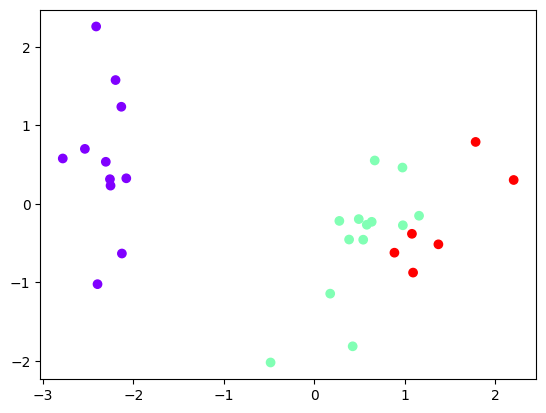

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x_test[:,0], x_test[:,1], c= y_test, cmap='rainbow')

LDA

Linear Dimensional Analysis is a type of dimensional reduction that takes out festures that are not necessary or not as necessary to the prediction model. This is a supervised dimensionality reduction technique. The two main goals are minimize the distance between data points within a cluster and maximizing the distance between individual clusters

In [ ]:
bank_df = pd.read_csv("banknote.csv")
bank_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
X = bank_df.drop(["class"], axis = 1)
Y = bank_df.filter(["class"], axis = 1)

Dividing data in 80%-20% training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This next output shows that with one component the maximim variance is achieved which means that only one of the features is needed to create a high accuracy.

In [ ]:
variance_ratios = lda.explained_variance_ratio_
print(variance_ratios)


[1.]


In [ ]:
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_pred =lg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.9890909090909091


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
